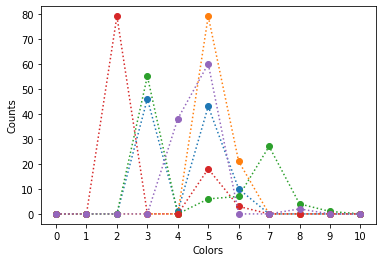

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# parameters of the DP
alpha, H = 1, binom(10, 0.5)

def urn_scheme(n=100):
    # binomial dist has 11 possible outcomes (aka "colours")
    # initially we have seen no colours, so set all counts to zero
    theta = {j:0 for j in range(11)}

    # 1st step: pick a new color
    col = H.rvs() 
    theta[col], urn = 1, [col] 

    # (k+1)th step
    for k in np.arange(1, n): 
        # either (i) pick a new col, or (ii) pick from urn
        u = np.random.uniform()
        col = H.rvs() if u<alpha/(alpha+k) else np.random.choice(urn)

        # place new ball into the urn
        urn.append(col)

        # keep track of the colours we have seen
        theta[col] += 1
        
    return theta

# Draw and plot 5 realisations
for i in range(5):
    plt.plot(range(11), urn_scheme().values(), 'o:')
plt.xlabel("Colors"); plt.ylabel("Counts"); plt.xticks(range(11));